## Load Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [2]:
df = pd.read_csv('census_income.csv')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [33]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [35]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
21750,39,Private,36376,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
21747,38,Private,229236,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Other,Male,0,0,40,Puerto-Rico,<=50K
7828,35,Federal-gov,20469,Some-college,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
5627,31,Private,120460,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,>50K
20396,30,Private,30063,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K
14532,29,Local-gov,383745,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1485,40,United-States,>50K
22412,55,Private,86505,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,20,United-States,<=50K
2600,56,Federal-gov,162137,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
27347,23,Private,146499,HS-grad,9,Separated,Machine-op-inspct,Unmarried,White,Female,0,0,48,United-States,<=50K
3703,34,Local-gov,106169,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


### Value Count Function

In [36]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [46]:
df['Fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [47]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [49]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [50]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [51]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [52]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [53]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [54]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [55]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

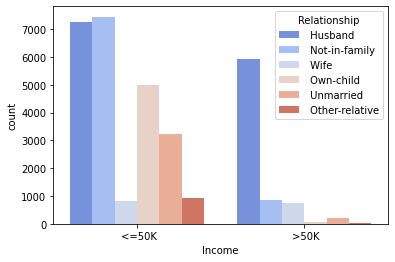

In [56]:
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df);

In [57]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

### Filling ? values

In [58]:
#replace the values with mode

print(df['Workclass'].mode())
print(df['Occupation'].mode())


print(df['Native_country'] .mode())

0     Private
Name: Workclass, dtype: object
0     Prof-specialty
Name: Occupation, dtype: object
0     United-States
Name: Native_country, dtype: object


In [59]:
df['Workclass'] = df['Workclass'].replace('?', 'Private')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace('?', 'United-States')

In [60]:
df.head(8)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


### Feature Engineering

### encoding

In [66]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [77]:
# education Category
df.Education= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.Education = df.Education.replace('HS-grad', 'high school')
df.Education = df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')


In [76]:
#martial status
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['Marital_status']= df['Marital_status'].replace(['Never-married'], 'not-married')
df['Marital_status']= df['Marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [68]:
# income
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Income"] = le.fit_transform( df["Income"].values.reshape (-1,1) )


In [79]:
from sklearn .preprocessing import OrdinalEncoder
enc =  OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [80]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


In [82]:
df['Marital_status'].value_counts()

2.0    14976
4.0    10682
0.0     4443
5.0     1025
6.0      993
3.0      418
1.0       23
Name: Marital_status, dtype: int64

In [84]:
df['Education'].value_counts()

11.0    10501
15.0     7291
9.0      5354
12.0     1723
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       646
14.0      576
6.0       514
2.0       433
10.0      413
4.0       333
3.0       168
13.0       51
Name: Education, dtype: int64

In [85]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

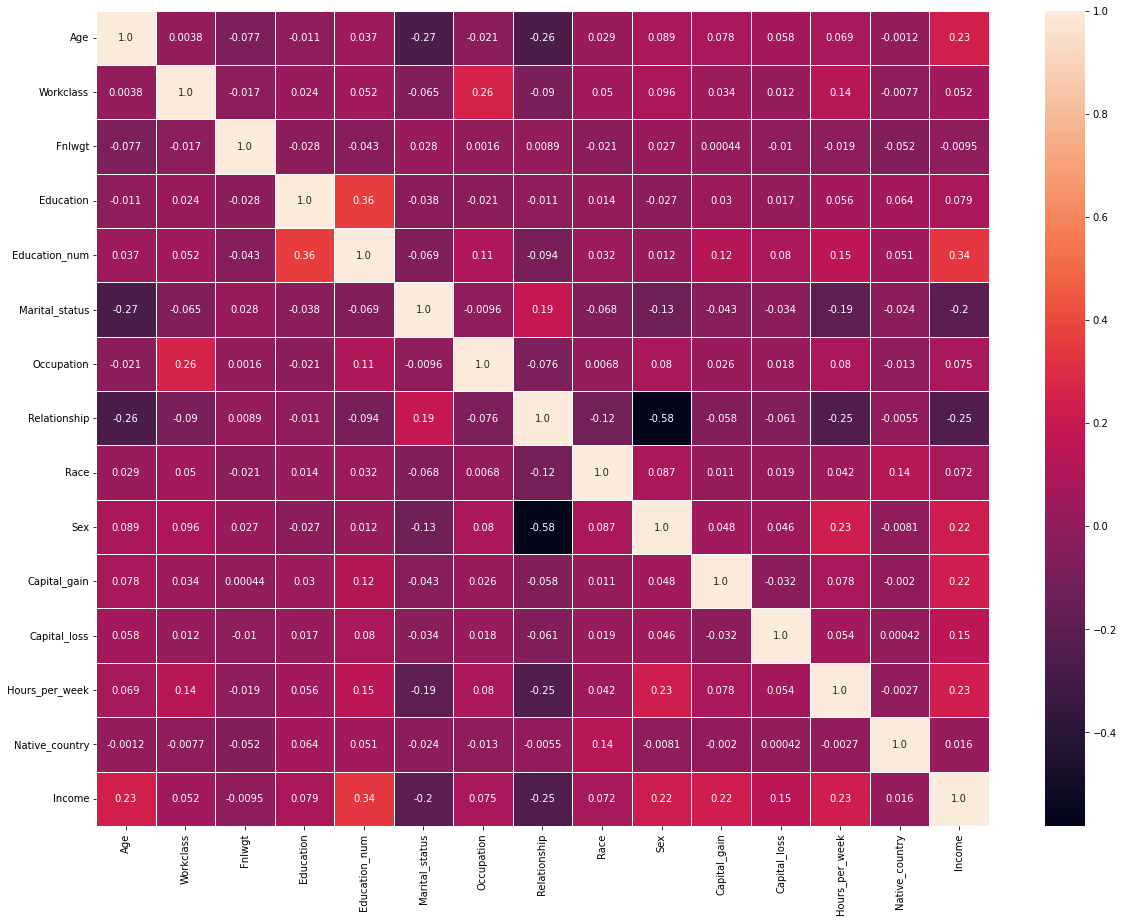

In [87]:

plt.figure(figsize =  (20,15))
sns.heatmap(df.corr(),annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [125]:



df.drop(["Fnlwgt"] , axis = 1 , inplace = True )

# datas are not much   correlated 

### Histogram

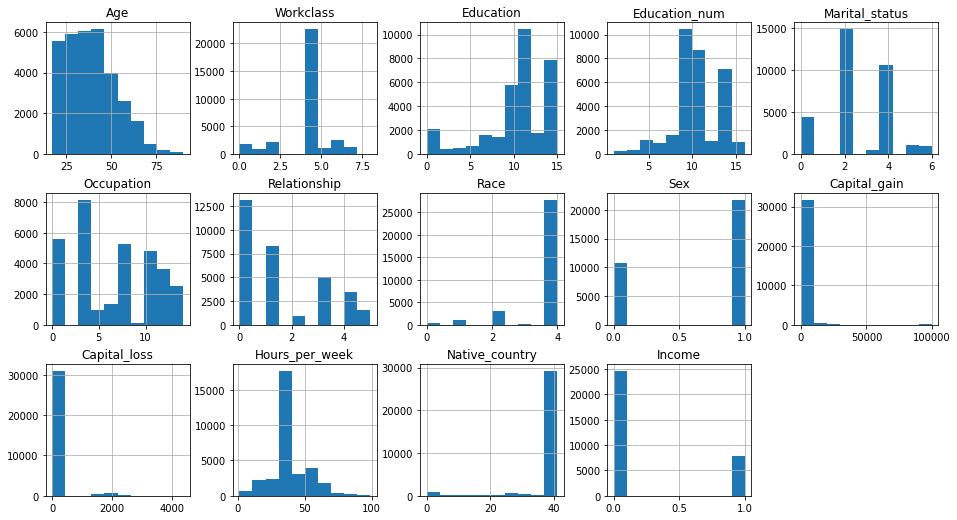

In [126]:
df.hist(figsize=(16,15), layout=(5,5), sharex=False);

### as we can see  most of the data have skewness and the data distribution is not proper 

## BoxPlot

<function matplotlib.pyplot.show(close=None, block=None)>

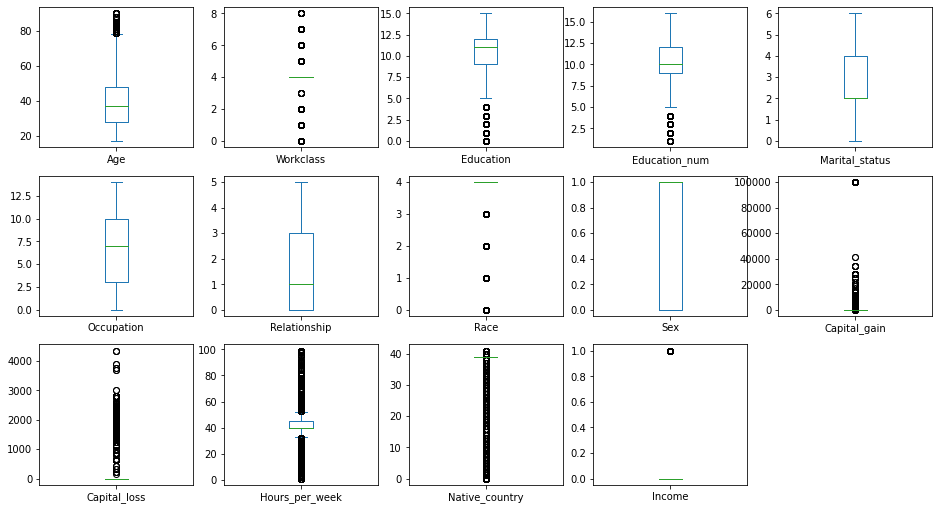

In [127]:
df.plot(kind='box', figsize=(16,15), layout=(5,5), sharex=False, subplots=True)
plt.show

### Plotly

In [128]:
import plotly.express as px

px.pie(df, values='Education_num', names='Education', 
      color_discrete_sequence = px.colors.qualitative.T10)

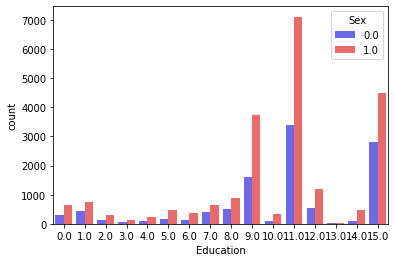

In [129]:
sns.countplot(df['Education'], hue='Sex', data=df, palette='seismic');

# outliers

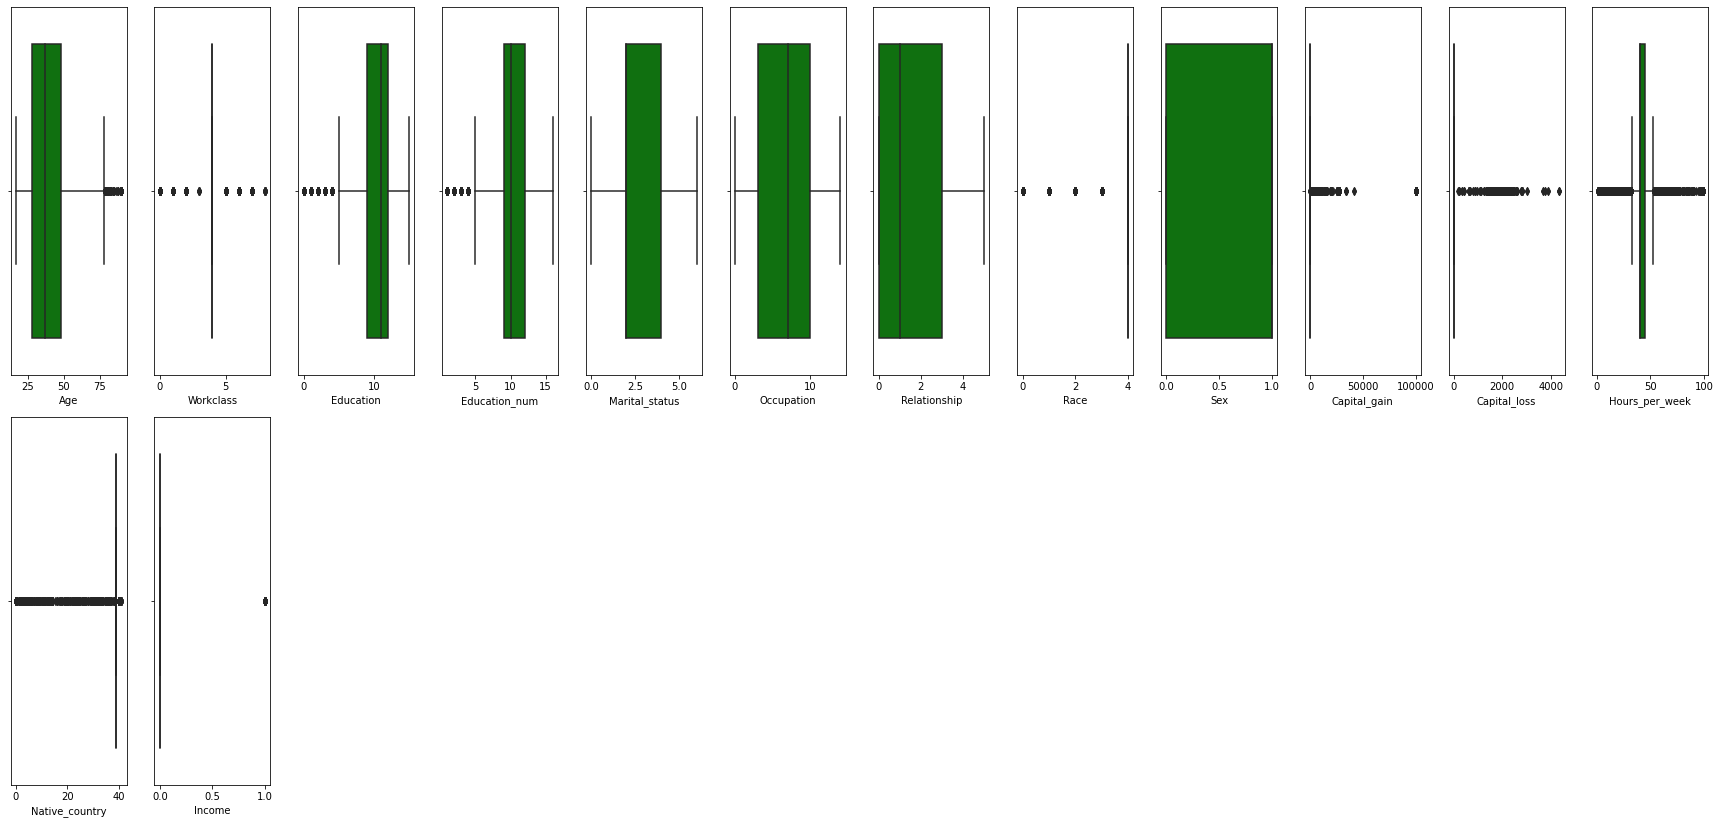

In [200]:
column = df.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

In [203]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
df.shape

(32560, 14)

In [205]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [206]:
len(np.where(z>3)[0])

5320

# skewness 

In [208]:
df.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [212]:
from sklearn.preprocessing import  power_transform
df["Workclass"] =  power_transform(df["Workclass"].array.reshape(-1, 1),method = 'yeo-johnson')

In [213]:
df["Education"] =  power_transform(df["Education"].array.reshape(-1, 1),method = 'yeo-johnson')

In [214]:
df["Relationship"] =  power_transform(df["Relationship"].array.reshape(-1, 1),method = 'yeo-johnson')

In [245]:
df["Race"] =  power_transform(df["Race"].array.reshape(-1, 1),method = 'yeo-johnson')

In [246]:
df["Capital_gain"] =  power_transform(df["Capital_gain"].array.reshape(-1, 1),method = 'yeo-johnson')

In [217]:
df["Native_country"] =  power_transform(df["Native_country"].array.reshape(-1, 1),method = 'yeo-johnson')

In [228]:
df["Capital_loss"] =  power_transform(df["Capital_loss"].array.reshape(-1, 1),method = 'yeo-johnson')


In [243]:

df["Sex"] =  power_transform(df["Sex"].array.reshape(-1, 1),method = 'yeo-johnson')

In [247]:
df.skew()

Age               0.558738
Workclass         0.033831
Education        -0.309431
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.122917
Race             -2.008214
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Native_country   -2.725467
Income            1.212383
dtype: float64

### Model Building

In [248]:
x= df.drop(['Income'], axis=1)
y = df['Income']


# over sampling                                         

In [249]:
df["Income"].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [250]:

from  imblearn.over_sampling import  SMOTE

sm = SMOTE()
x,y  = sm.fit_resample(x,y)



In [251]:
x.shape

(49438, 13)

In [252]:
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

# split train test 

In [263]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [264]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

### Logistic Regression

In [267]:
lr = LogisticRegression()


for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .30)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  77.85644107958157
 testing  score is  0 is 78.07443365695794 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  77.40276252672948
 testing  score is  1 is 77.09681769147788 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  77.79286828873606
 testing  score is  2 is 77.831715210356 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  77.4865630237531
 testing  score is  3 is 77.62270765911543 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  77.9778073166503
 testing  score is  4 is 77.41370010787486 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  77.89978616424898
 testing  score is  5 is 77.52831715210357 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  77.60503958851066
 testing  score is  

at random state 55 model preforms best
at random_state =   55
training score at 55 is  77.7755302548691
 testing  score is  55 is 77.80474649406688 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  77.53857712535398
 testing  score is  56 is 77.46763754045307 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  76.61099231347166
 testing  score is  57 is 76.96871628910465 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  77.8911171473155
 testing  score is  58 is 77.95981661272924 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  77.87955845807085
 testing  score is  59 is 77.83845738942826 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  77.75241287637982
 testing  score is  60 is 77.93959007551241 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  77.463445

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 76 , test_size = .30)

lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")


training score is  0.7769461943015662
 testing  score is 0.7812837108953614
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      7339
           1       0.77      0.81      0.79      7493

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832

[[5537 1802]
 [1442 6051]] 



## Random Forest Classifier

In [275]:
rfc = RandomForestClassifier()


for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .40)
    rfc.fit(x_train,y_train)
    pred_train = rfc.predict(x_train)
    pred_test = rfc.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  98.28062841345829
 testing  score is  0 is 88.37479773462783 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  98.23680129458566
 testing  score is  1 is 88.13207928802589 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  98.28737104713102
 testing  score is  2 is 88.207928802589 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  98.24354392825838
 testing  score is  3 is 88.17253236245955 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  98.3278268491673
 testing  score is  4 is 88.34445792880258 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  98.27388577978559
 testing  score is  5 is 88.02083333333334 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  98.24017261142201
 testing  score is 

at random state 55 model preforms best
at random_state =   55
training score at 55 is  98.23680129458566
 testing  score is  55 is 88.11185275080906 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  98.27725709662194
 testing  score is  56 is 88.41019417475728 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  98.26040051244016
 testing  score is  57 is 88.12702265372168 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  98.28399973029465
 testing  score is  58 is 88.1371359223301 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  98.29748499764008
 testing  score is  59 is 88.35962783171522 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  98.28737104713102
 testing  score is  60 is 88.55683656957929 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  98.28062

In [292]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 76 , test_size = .30)

rfc.fit(x_train,y_train)
pred_train = rfc.predict(x_train)
pred_test = rfc.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")

training score is  0.981332716869907
 testing  score is 0.8838996763754046
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7339
           1       0.88      0.89      0.89      7493

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

[[6449  890]
 [ 832 6661]] 



# extra tree classifier 

In [279]:
etc = ExtraTreesClassifier()


for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .0)
    etc.fit(x_train,y_train)
    pred_train = etc.predict(x_train)
    pred_test = etc.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  98.28399973029465
 testing  score is  0 is 88.18770226537217 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  98.24017261142201
 testing  score is  1 is 88.08151294498381 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  98.28737104713102
 testing  score is  2 is 88.02588996763754 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  98.24354392825838
 testing  score is  3 is 87.80339805825243 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  98.3278268491673
 testing  score is  4 is 87.81856796116504 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  98.27725709662194
 testing  score is  5 is 87.76294498381877 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  98.24017261142201
 testing  score i

at random state 55 model preforms best
at random_state =   55
training score at 55 is  98.23680129458566
 testing  score is  55 is 87.7123786407767 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  98.27725709662194
 testing  score is  56 is 88.19275889967638 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  98.26040051244016
 testing  score is  57 is 87.77305825242718 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  98.28399973029465
 testing  score is  58 is 87.72249190938511 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  98.29748499764008
 testing  score is  59 is 87.9904935275081 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  98.29074236396737
 testing  score is  60 is 88.38491100323624 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  98.280628

In [293]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = 85 , test_size = .30)

etc.fit(x_train,y_train)
pred_train = etc.predict(x_train)
pred_test = etc.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")

training score is  0.9820262382245853
 testing  score is 0.8849110032362459
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7481
           1       0.88      0.89      0.89      7351

    accuracy                           0.88     14832
   macro avg       0.89      0.88      0.88     14832
weighted avg       0.89      0.88      0.88     14832

[[6555  926]
 [ 781 6570]] 



# k neighbors

In [284]:
kn = KNeighborsClassifier()

for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .40)
    kn.fit(x_train,y_train)
    pred_train = kn.predict(x_train)
    pred_test = kn.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  87.49915717079091
 testing  score is  0 is 82.73159385113269 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  87.67446564628145
 testing  score is  1 is 82.57989482200647 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  87.65760906209965
 testing  score is  2 is 82.86812297734627 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  87.62726721057244
 testing  score is  3 is 82.77710355987054 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  87.63400984424517
 testing  score is  4 is 82.35740291262135 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  87.73514934933586
 testing  score is  5 is 82.49393203883496 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  87.76549120086305
 testing  score 

at random state 55 model preforms best
at random_state =   55
training score at 55 is  87.62052457689974
 testing  score is  55 is 82.43325242718447 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  87.62052457689974
 testing  score is  56 is 82.77204692556634 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  87.85651675544469
 testing  score is  57 is 82.67597087378641 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  87.85988807228104
 testing  score is  58 is 82.28155339805825 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  87.47555795293643
 testing  score is  59 is 82.96419902912622 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  87.6002966758816
 testing  score is  60 is 82.66585760517799 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  87.80931

In [294]:
kn.fit(x_train,y_train)
pred_train = kn.predict(x_train)
pred_test = kn.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")

training score is  0.8812344680113275
 testing  score is 0.8294902912621359
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      7481
           1       0.78      0.92      0.84      7351

    accuracy                           0.83     14832
   macro avg       0.84      0.83      0.83     14832
weighted avg       0.84      0.83      0.83     14832

[[5559 1922]
 [ 607 6744]] 



#   GaussianNB

In [288]:
nb = GaussianNB()


for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .40)
    nb.fit(x_train,y_train)
    pred_train = nb.predict(x_train)
    pred_test = nb.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  77.47623221630369
 testing  score is  0 is 77.93790453074433 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  77.48634616681275
 testing  score is  1 is 77.92779126213593 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  77.68525386015777
 testing  score is  2 is 77.58899676375405 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  77.62457015710336
 testing  score is  3 is 77.78620550161813 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  77.98530105859348
 testing  score is  4 is 77.35133495145631 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  77.90438945452094
 testing  score is  5 is 77.34122168284789 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  77.55714382037624
 testing  score 

at random state 55 model preforms best
at random_state =   55
training score at 55 is  77.71559571168498
 testing  score is  55 is 77.39178802588997 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  77.76616546423033
 testing  score is  56 is 77.62439320388349 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  77.43240509743106
 testing  score is  57 is 78.01881067961165 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  77.93135998921178
 testing  score is  58 is 77.22491909385113 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  77.60097093924887
 testing  score is  59 is 77.83677184466019 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  77.67851122648507
 testing  score is  60 is 77.69518608414239 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  77.7122

In [295]:
nb.fit(x_train,y_train)
pred_train = nb.predict(x_train)
pred_test = nb.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")

training score is  0.7778997861642489
 testing  score is 0.7748112189859763
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      7481
           1       0.76      0.79      0.78      7351

    accuracy                           0.77     14832
   macro avg       0.78      0.77      0.77     14832
weighted avg       0.78      0.77      0.77     14832

[[5663 1818]
 [1522 5829]] 



In [310]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],"max_features" : ["sqrt", "log2", "auto"]}


In [314]:
clf = GridSearchCV(et,param_grid)
clf.fit(x_train , y_train)
print(clf.best_params_)

{'criterion': 'log_loss', 'max_features': 'auto'}


In [317]:
et = ExtraTreesClassifier()
from sklearn.model_selection import cross_val_score


In [318]:
et = ExtraTreesClassifier(criterion = 'log_loss' ,max_features =  'auto' )

In [323]:
et.fit(x_train , y_train)
pred_train = et.predict(x_train)
pred_test = et.predict(x_test)
print("training score at" , "is " ,accuracy_score(y_train, pred_train)*100)
print(" testing  score is ", "is" , accuracy_score(y_test, pred_test)*100,"\n")
kn  = model_selection.KFold(n_splits=7 )
cross_val = cross_val_score(et,x,y, cv=kn)
rmf_cv = cross_val.mean()
print("cv " , rmf_cv)


print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")


training score at is  98.20262382245853
 testing  score is  is 88.47761596548004 

cv  0.8851727822578948
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7481
           1       0.88      0.89      0.88      7351

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

[[6550  931]
 [ 778 6573]] 



# extra tree is the best mode with 
# training score at is  98.20262382245853
# testing  score is  is 88.47761596548004 

# cv  0.8851727822578948

In [324]:
from sklearn.metrics  import roc_curve,auc


In [325]:
y_precict_proba = et.predict_proba(x_test)[:,1]

In [326]:
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba )

In [327]:
roc_auc  =  auc(fpr,tpr)

In [328]:
roc_auc

0.9402126069850814

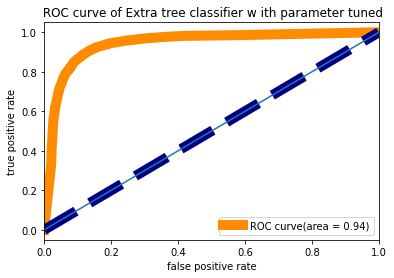

In [329]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title (" ROC curve of Extra tree classifier w ith parameter tuned")
plt.legend(loc="lower right")


plt.show()

#  area under the curve is 0.94

# saving model 


In [330]:
import pickle
filename = "census.pkl"
pickle.dump(et, open(filename,"wb"))